In [ ]:
!pip install simplejson
!pip install pandas
!pip install numpy
!pip install pendulum

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum 
from collections import Counter
import re

# **Data**

**Data Collection**: To overcome the limitations set forth by Twitter APIs, we decided to use snscrape. Doing so gave us access to more tweets and a choice of time period on which we wanted to focus our study. Web scraping using snscrape is quite straighr forward. We ran two commands to get a high volume of tweets from two days; one normal day in the summer and the other, Black Friday 2020. 

Having installed snscrape on your computer, the following command can be run to scrape tweets:
> `snscrape --jsonl --progress --max-results 38000 --since 2020-11-26 twitter-hashtag "BlackFriday until:2020-11-28" > BlackFridaytweets.json`

This command fetches up to 38,000 tweets surround Black Friday and saves it in JSON format in the file "BlackFridaytweets.json".

In [ ]:
drive.mount('/content/gdrive')
path = './gdrive/MyDrive/TSW_data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


First, let us get a taste of the tweets scraped for this years' Black Friday.

In [ ]:
df_BF = pd.read_json('/content/gdrive/MyDrive/TSW_Data/BlackFridaytweets.json', lines = True)
df_BF.head() #overview of the scraped data for tweets related to black friday. 

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/roganuof/status/1332474283...,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,1332474283298316290,"{'username': 'roganuof', 'displayname': 'rogan...",[https://justfor.fans/roganuof?Source=Twitter&...,[https://t.co/lWqfD557Z0],0,0,0,0,1320395229485215746,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'CCE_Guide', 'displayname': 'CCE..."
1,https://twitter.com/guestrevu/status/133247428...,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,Get your hotel’s guest feedback and online rep...,1332474282950189063,"{'username': 'guestrevu', 'displayname': 'Gues...",[https://hubs.ly/H0BDLHS0],[https://t.co/9CdstSDgIG],0,0,1,0,1332474282950189063,en,"<a href=""http://www.hubspot.com/"" rel=""nofollo...",http://www.hubspot.com/,HubSpot,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
2,https://twitter.com/OneGrumpyBoi/status/133247...,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,1332474274175737856,"{'username': 'OneGrumpyBoi', 'displayname': 'O...",[https://twitch.tv/onegrumpyboi],[https://t.co/E8EMWLM9VK],0,2,4,0,1332474274175737856,en,"<a href=""https://streamlabs.com"" rel=""nofollow...",https://streamlabs.com,Streamlabs Twitter,None,NaN,None,None
3,https://twitter.com/Braunibrown/status/1332474...,2020-11-27 23:59:57+00:00,Viernes de estafa en Honduras. #BlackFriday202...,Viernes de estafa en Honduras. #BlackFriday202...,1332474271373856776,"{'username': 'Braunibrown', 'displayname': '\m...",[],[],0,0,0,0,1332474271373856776,es,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,None,NaN,None,None
4,https://twitter.com/On_demand365/status/133247...,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,Brand New Zebra Gk420 Direct thermal printer f...,1332474265040392194,"{'username': 'On_demand365', 'displayname': 'O...",[],[],0,0,0,0,1332474265040392194,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None


In [ ]:
len(df_BF) #we have 36,110 tweets.

36110

Let us drop non-english tweets from the dataset. 

In [ ]:
df_BF = df_BF[df_BF['lang'] == 'en'] 
len(df_BF)

25224

We now have 25,224 tweets that are in English. 


Now, let us repeat the actions for a second dataset of tweets scraped from August 31,2020. The command for this:
>  `snscrape --jsonl --progress --max-results 30000 --since 2020-07-31 twitter-hashtag "Shopping until:2020-08-31" > Shopping.json`
We use the keyword "Shopping" here to gather tweets related to shopping in this time period.

In [ ]:
df_NBF = pd.read_json('/content/gdrive/MyDrive/TSW_Data/shopping.json', lines = True)
df_NBF.head() #overview of the scraped data for the month of august for tweets related to shopping.

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/jonak18/status/13002216737...,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,🔥 Umorden Family Cleopatra Cosplay for Women G...,1300221673719959556,"{'username': 'jonak18', 'displayname': 'jonak'...",[https://bit.ly/2C42ASe],[https://t.co/LYgW4PyrPG],0,0,0,0,1300221673719959556,en,"<a href=""https://socialrabbitplugin.com/"" rel=...",https://socialrabbitplugin.com/,SocialRabbit Plugin,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
1,https://twitter.com/shoptropicalB/status/13002...,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,1300221501745106944,"{'username': 'shoptropicalB', 'displayname': '...",[https://www.instagram.com/p/CEiGJFEJmfI/?igsh...,[https://t.co/PmmLScoXU0],0,0,0,0,1300221501745106944,en,"<a href=""http://instagram.com"" rel=""nofollow"">...",http://instagram.com,Instagram,None,NaN,None,None
2,https://twitter.com/SaversUsa/status/130022097...,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,saversspotusa.com/product/whiske… Decanter Glo...,1300220978530721793,"{'username': 'SaversUsa', 'displayname': 'Save...",[https://saversspotusa.com/product/whiskey-dec...,[https://t.co/BxkGS4NrJq],0,0,0,0,1300220978530721793,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
3,https://twitter.com/Accesa_Shop/status/1300220...,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,Boho Rattan Straw Women's Beach Bag accesashop...,1300220910008512512,"{'username': 'Accesa_Shop', 'displayname': 'Ac...",[https://accesashop.com/boho-rattan-straw-wome...,[https://t.co/ZrgFLAik7F],0,0,0,0,1300220910008512512,en,"<a href=""https://socialrabbitplugin.com/"" rel=...",https://socialrabbitplugin.com/,SocialRabbit Plugin,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None
4,https://twitter.com/ViecBuonBan/status/1300220...,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,Lingzhi Extract - Health Protective Food $23.6...,1300220113464053760,"{'username': 'ViecBuonBan', 'displayname': 'Vi...",[https://j.mp/2tegDPg],[https://t.co/BZJ9AODqWR],0,2,2,0,1300220113464053760,en,"<a href=""https://www.viecbuonban.com"" rel=""nof...",https://www.viecbuonban.com,Viec Buon Ban,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None


In [ ]:
len(df_NBF)

30000

In [ ]:
df_NBF = df_NBF[df_NBF['lang'] == 'en'] 
len(df_NBF)

21479


As seen above, we now have two dataframes of seemingly relevant tweets in English; one daataframe (df_BF) for black friday tweets and another (df_NBF) for non black friday shopping tweets spread over the month of August.



However, the tweets by themselves are accompanied by a lot of information; some relevant and some irrelevant to our study. We will now discard the irrelevant information and refine our datasets so that they can be efficiently used for processing and analyzing.  

For the research questions we asked, we can make use of time, the actual tweet and perhaps the user and user mentions. So let us drop the columns not pertaining to our interests.

In [ ]:
df_BF = df_BF.drop(columns=['url', 'renderedContent', 'id', 'user', 'outlinks', 'tcooutlinks', 'replyCount',	'retweetCount',	'likeCount',	'quoteCount',	'conversationId', 'source',	'sourceUrl',	'sourceLabel',	'media',	'retweetedTweet',	'quotedTweet' ])
df_BF.head()

,date,content,lang,mentionedUsers
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE..."
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon..."


In [ ]:
df_NBF = df_NBF.drop(columns=['url', 'renderedContent', 'id', 'user', 'outlinks', 'tcooutlinks', 'replyCount',	'retweetCount',	'likeCount',	'quoteCount',	'conversationId', 'source',	'sourceUrl',	'sourceLabel',	'media',	'retweetedTweet',	'quotedTweet' ])
df_NBF.head()

,date,content,lang,mentionedUsers
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None


Let us now create a new column to extract hashtags.

In [ ]:
#Hashtags for Blackfriday
df_BF['#'] = df_BF['content'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df_BF.head(10)

,date,content,lang,mentionedUsers,#
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE...",#BlackFriday #Daddy
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None,#BlackFriday
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None,#DestinyTheGame #BlackFriday #SupportSmallStre...
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None,#BlackFriday
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon...",#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...
6,2020-11-27 23:59:52+00:00,IN ONE HOUR starting at 8pm EST US\n\nBACK IN ...,en,None,#BlackFriday
7,2020-11-27 23:59:51+00:00,@Arabianboyl @newdanton Enjoy this #BlackFrida...,en,"[{'username': 'Arabianboyl', 'displayname': 'A...",#BlackFriday #Daddy
8,2020-11-27 23:59:50+00:00,He's the absolute #Worst of everything! Such a...,en,None,#Worst #LOSER #BlackFriday #DiaperDonald
9,2020-11-27 23:59:49+00:00,Us because it's #BlackFriday https://t.co/Ypmr...,en,None,#BlackFriday
10,2020-11-27 23:59:46+00:00,"@ThatGuyInGaming Hey mate, Today is Black Frid...",en,"[{'username': 'ThatGuyInGaming', 'displayname'...",#BlackFriday


In [ ]:
#Hashtags for August, or, not Black Friday.
df_NBF['#'] = df_NBF['content'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df_NBF.head(10)

,date,content,lang,mentionedUsers,#
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None,#trend #shopping
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None,#tropicalbabes #tropicalbabesshorts #clothing ...
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None,#shopnow #shopping #shoponline #relaxingmusic
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None,#moda #shopping
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None,#Supplements #LingChi #Lingzhi #Vietnam #Shopping
5,2020-08-30 23:53:22+00:00,Thien Thao - Green medicaded oil $1.84 #Medica...,en,None,#MedicatedOil #Cough #Colds #Headache #Vietnam...
6,2020-08-30 23:53:21+00:00,Magic Silicone Kitchen Cleaning Gloves https:/...,en,None,#shopping #shoppingonline #shoppingguide #shop...
8,2020-08-30 23:51:42+00:00,TOMLOV 2MP HD WiFi Outdoor PTZ Security Camera...,en,None,#coupons #deals #shopping #shop
9,2020-08-30 23:45:01+00:00,Bath &amp; Body Works in Buffalo's Walden Gall...,en,None,#lawsuits #malls #shopping #Buffalo #NewYork #WNY
12,2020-08-30 23:43:32+00:00,Winners always has the best stuff. If only I d...,en,None,#dogmom


# Overall Sentiment Analysis
For overall sentiment analysis, we use TextBlob and set polarity values to -1(negative), 0(neutral) and 1(positive).

In [ ]:
# Sentiment Analysis 
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
df_BF['sentiment'] = df_BF['content'].apply(lambda x: analyze_sentiment(x))

In [ ]:
# Percentages
sentiments_BF = df_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'Count'}))
sentiments_BF['% of total'] = sentiments_BF['Count']/sentiments_BF['Count'].sum()
sentiments_BF ['Sentiment'] = ['Negative', 'Neutral', 'Positive']
sentiments_BF = sentiments_BF.reindex(columns = ['Sentiment', 'Count','% of total'])
sentiments_BF

,Sentiment,Count,% of total
sentiment,,,
-1,Negative,4281,0.169719
0,Neutral,6668,0.264351
1,Positive,14275,0.565929


In [ ]:
df_NBF['sentiment'] = df_NBF['content'].apply(lambda x: analyze_sentiment(x))

In [ ]:
# Percentages
sentiments_NBF = df_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'Count'}))
sentiments_NBF['% of total'] = sentiments_NBF['Count']/sentiments_NBF['Count'].sum()
sentiments_NBF ['Sentiment'] = ['Negative', 'Neutral', 'Positive']
sentiments_NBF = sentiments_NBF.reindex(columns = ['Sentiment', 'Count','% of total'])
sentiments_NBF

,Sentiment,Count,% of total
sentiment,,,
-1,Negative,2348,0.109316
0,Neutral,6237,0.290377
1,Positive,12894,0.600307


As seen above, on black friday, the level of negativity is a bit hightened as compared to our data collected over the month of August. 
We observe that the sentiments around "#shopping" are more positive than #BlackFriday2020.

To effectively recognize entities in tweets and hashtags, we need to perform some basic Natural Language Processing, or, NLP.

In [ ]:
#Create a function to remove unwanted characters from text
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:
df_BF['refinedTweets'] = np.vectorize(remove_pattern)(df_BF['content'], "@[\w]*: | *RT*")
df_BF.head(10)

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE...",#BlackFriday #Daddy,1,@CCE_Guide Enjoy this #BlackFriday with #Daddy...
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None,#BlackFriday,1,Get your hotel’s guest feedback and online rep...
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None,#DestinyTheGame #BlackFriday #SupportSmallStre...,1,((WE AE LIVE!)) [Destiny 2] Black Friday Desti...
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None,#BlackFriday,1,Brand New Zebra Gk420 Direct thermal printer f...
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon...",#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...,-1,Support a Black owned company this #BlackFrida...
6,2020-11-27 23:59:52+00:00,IN ONE HOUR starting at 8pm EST US\n\nBACK IN ...,en,None,#BlackFriday,-1,IN ONE HOU starting at 8pm EST US\n\nBACK IN B...
7,2020-11-27 23:59:51+00:00,@Arabianboyl @newdanton Enjoy this #BlackFrida...,en,"[{'username': 'Arabianboyl', 'displayname': 'A...",#BlackFriday #Daddy,1,@Arabianboyl @newdanton Enjoy this #BlackFrida...
8,2020-11-27 23:59:50+00:00,He's the absolute #Worst of everything! Such a...,en,None,#Worst #LOSER #BlackFriday #DiaperDonald,-1,He's the absolute #Worst of everything! Such a...
9,2020-11-27 23:59:49+00:00,Us because it's #BlackFriday https://t.co/Ypmr...,en,None,#BlackFriday,0,Us because it's #BlackFriday https://t.co/Ypmr...
10,2020-11-27 23:59:46+00:00,"@ThatGuyInGaming Hey mate, Today is Black Frid...",en,"[{'username': 'ThatGuyInGaming', 'displayname'...",#BlackFriday,1,"@ThatGuyInGaming Hey mate, Today is Black Frid..."


In [ ]:
df_NBF['refinedTweets'] = np.vectorize(remove_pattern)(df_NBF['content'], "@[\w]*: | *RT*")
df_NBF.head(10)

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None,#trend #shopping,0,🔥 Umorden Family Cleopatra Cosplay for Women G...
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None,#tropicalbabes #tropicalbabesshorts #clothing ...,1,🌸🌴 NEW AIVALS EVEY SUNDAY 🌴🌸 \n•\n•\n•\n\n•\n•...
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None,#shopnow #shopping #shoponline #relaxingmusic,0,https://t.co/BxkGS4NrJq Decanter Globe Set wit...
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None,#moda #shopping,0,Bohoattan Straw Women's Beach Bag https://t.co...
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None,#Supplements #LingChi #Lingzhi #Vietnam #Shopping,0,Lingzhi Extract - Health Protective Food $23.6...
5,2020-08-30 23:53:22+00:00,Thien Thao - Green medicaded oil $1.84 #Medica...,en,None,#MedicatedOil #Cough #Colds #Headache #Vietnam...,-1,Thien Thao - Green medicaded oil $1.84 #Medica...
6,2020-08-30 23:53:21+00:00,Magic Silicone Kitchen Cleaning Gloves https:/...,en,None,#shopping #shoppingonline #shoppingguide #shop...,1,Magic Silicone Kitchen Cleaning Gloves https:/...
8,2020-08-30 23:51:42+00:00,TOMLOV 2MP HD WiFi Outdoor PTZ Security Camera...,en,None,#coupons #deals #shopping #shop,0,TOMLOV 2MP HD WiFi Outdoor PTZ Security Camera...
9,2020-08-30 23:45:01+00:00,Bath &amp; Body Works in Buffalo's Walden Gall...,en,None,#lawsuits #malls #shopping #Buffalo #NewYork #WNY,-1,Bath &amp; Body Works in Buffalo's Walden Gall...
12,2020-08-30 23:43:32+00:00,Winners always has the best stuff. If only I d...,en,None,#dogmom,1,Winners always has the best stuff. If only I d...


In [ ]:
#Remove hyperlinks contained in tweets.
cleanTweets_BF = []

for index, row in df_BF.iterrows():
    words_without_links = [word for word in row.refinedTweets.split() if 'http' not in word]
    cleanTweets_BF.append(' '.join(words_without_links))

df_BF['refinedTweets'] = cleanTweets_BF
df_BF.head(10)

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE...",#BlackFriday #Daddy,1,@CCE_Guide Enjoy this #BlackFriday with #Daddy...
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None,#BlackFriday,1,Get your hotel’s guest feedback and online rep...
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None,#DestinyTheGame #BlackFriday #SupportSmallStre...,1,((WE AE LIVE!)) [Destiny 2] Black Friday Desti...
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None,#BlackFriday,1,Brand New Zebra Gk420 Direct thermal printer f...
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon...",#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...,-1,Support a Black owned company this #BlackFrida...
6,2020-11-27 23:59:52+00:00,IN ONE HOUR starting at 8pm EST US\n\nBACK IN ...,en,None,#BlackFriday,-1,IN ONE HOU starting at 8pm EST US BACK IN BLAC...
7,2020-11-27 23:59:51+00:00,@Arabianboyl @newdanton Enjoy this #BlackFrida...,en,"[{'username': 'Arabianboyl', 'displayname': 'A...",#BlackFriday #Daddy,1,@Arabianboyl @newdanton Enjoy this #BlackFrida...
8,2020-11-27 23:59:50+00:00,He's the absolute #Worst of everything! Such a...,en,None,#Worst #LOSER #BlackFriday #DiaperDonald,-1,He's the absolute #Worst of everything! Such a...
9,2020-11-27 23:59:49+00:00,Us because it's #BlackFriday https://t.co/Ypmr...,en,None,#BlackFriday,0,Us because it's #BlackFriday
10,2020-11-27 23:59:46+00:00,"@ThatGuyInGaming Hey mate, Today is Black Frid...",en,"[{'username': 'ThatGuyInGaming', 'displayname'...",#BlackFriday,1,"@ThatGuyInGaming Hey mate, Today is Black Frid..."


In [ ]:
cleanTweets_NBF = []

for index, row in df_NBF.iterrows():
    words_without_links = [word for word in row.refinedTweets.split() if 'http' not in word]
    cleanTweets_NBF.append(' '.join(words_without_links))

df_NBF['refinedTweets'] = cleanTweets_NBF
df_NBF.head(10)

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None,#trend #shopping,0,🔥 Umorden Family Cleopatra Cosplay for Women G...
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None,#tropicalbabes #tropicalbabesshorts #clothing ...,1,🌸🌴 NEW AIVALS EVEY SUNDAY 🌴🌸 • • • • • • #trop...
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None,#shopnow #shopping #shoponline #relaxingmusic,0,Decanter Globe Set with 2 Etched Globe Whisky ...
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None,#moda #shopping,0,Bohoattan Straw Women's Beach Bag #moda #shopping
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None,#Supplements #LingChi #Lingzhi #Vietnam #Shopping,0,Lingzhi Extract - Health Protective Food $23.6...
5,2020-08-30 23:53:22+00:00,Thien Thao - Green medicaded oil $1.84 #Medica...,en,None,#MedicatedOil #Cough #Colds #Headache #Vietnam...,-1,Thien Thao - Green medicaded oil $1.84 #Medica...
6,2020-08-30 23:53:21+00:00,Magic Silicone Kitchen Cleaning Gloves https:/...,en,None,#shopping #shoppingonline #shoppingguide #shop...,1,Magic Silicone Kitchen Cleaning Gloves $ 15.99...
8,2020-08-30 23:51:42+00:00,TOMLOV 2MP HD WiFi Outdoor PTZ Security Camera...,en,None,#coupons #deals #shopping #shop,0,TOMLOV 2MP HD WiFi Outdoor PTZ Security Camera...
9,2020-08-30 23:45:01+00:00,Bath &amp; Body Works in Buffalo's Walden Gall...,en,None,#lawsuits #malls #shopping #Buffalo #NewYork #WNY,-1,Bath &amp; Body Works in Buffalo's Walden Gall...
12,2020-08-30 23:43:32+00:00,Winners always has the best stuff. If only I d...,en,None,#dogmom,1,Winners always has the best stuff. If only I d...


In [ ]:
df_BF = df_BF[df_BF['refinedTweets']!='']
df_BF.head()

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE...",#BlackFriday #Daddy,1,@CCE_Guide Enjoy this #BlackFriday with #Daddy...
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None,#BlackFriday,1,Get your hotel’s guest feedback and online rep...
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None,#DestinyTheGame #BlackFriday #SupportSmallStre...,1,((WE AE LIVE!)) [Destiny 2] Black Friday Desti...
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None,#BlackFriday,1,Brand New Zebra Gk420 Direct thermal printer f...
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon...",#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...,-1,Support a Black owned company this #BlackFrida...


In [ ]:
df_NBF = df_NBF[df_NBF['refinedTweets']!='']
df_NBF.head()

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None,#trend #shopping,0,🔥 Umorden Family Cleopatra Cosplay for Women G...
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None,#tropicalbabes #tropicalbabesshorts #clothing ...,1,🌸🌴 NEW AIVALS EVEY SUNDAY 🌴🌸 • • • • • • #trop...
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None,#shopnow #shopping #shoponline #relaxingmusic,0,Decanter Globe Set with 2 Etched Globe Whisky ...
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None,#moda #shopping,0,Bohoattan Straw Women's Beach Bag #moda #shopping
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None,#Supplements #LingChi #Lingzhi #Vietnam #Shopping,0,Lingzhi Extract - Health Protective Food $23.6...


In [ ]:
#Drop duplicates
df_BF.drop_duplicates(subset=['refinedTweets'], keep=False)
df_BF.head()

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE...",#BlackFriday #Daddy,1,@CCE_Guide Enjoy this #BlackFriday with #Daddy...
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None,#BlackFriday,1,Get your hotel’s guest feedback and online rep...
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None,#DestinyTheGame #BlackFriday #SupportSmallStre...,1,((WE AE LIVE!)) [Destiny 2] Black Friday Desti...
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None,#BlackFriday,1,Brand New Zebra Gk420 Direct thermal printer f...
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon...",#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...,-1,Support a Black owned company this #BlackFrida...


In [ ]:
#Drop duplicates
df_NBF.drop_duplicates(subset=['refinedTweets'], keep=False)
df_NBF.head()

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None,#trend #shopping,0,🔥 Umorden Family Cleopatra Cosplay for Women G...
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None,#tropicalbabes #tropicalbabesshorts #clothing ...,1,🌸🌴 NEW AIVALS EVEY SUNDAY 🌴🌸 • • • • • • #trop...
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None,#shopnow #shopping #shoponline #relaxingmusic,0,Decanter Globe Set with 2 Etched Globe Whisky ...
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None,#moda #shopping,0,Bohoattan Straw Women's Beach Bag #moda #shopping
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None,#Supplements #LingChi #Lingzhi #Vietnam #Shopping,0,Lingzhi Extract - Health Protective Food $23.6...


In [ ]:
pip install unidecode

     |████████████████████████████████| 245kB 4.5MB/s 


In [ ]:
import unidecode

In [ ]:
df_BF['refinedTweets'] = df_BF['refinedTweets'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))
df_NBF['refinedTweets'] = df_NBF['refinedTweets'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [ ]:
df_BF['refinedTweets'] = df_BF['refinedTweets'].str.replace("[^a-zA-Z# ]", "")
df_NBF['refinedTweets'] = df_NBF['refinedTweets'].str.replace("[^a-zA-Z# ]", "")

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
stopwords = set(stopwords.words("english"))

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Remove Stopwords using NLT-K stopward set.
stopwords = set(stopwords)
cleanTweets = []

for index, row in df_BF.iterrows():
    
    words_without_stopwords = [word for word in row.refinedTweets.split() if not word in stopwords]
    cleanTweets.append(' '.join(words_without_stopwords))

df_BF['refinedTweets'] = cleanTweets
df_BF.head(10)

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE...",#BlackFriday #Daddy,1,CCEGuide Enjoy #BlackFriday #Daddy amp I See
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None,#BlackFriday,1,Get hotels guest feedback online reputation ma...
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None,#DestinyTheGame #BlackFriday #SupportSmallStre...,1,WE AE LIVE Destiny Black Friday Destiny Chill ...
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None,#BlackFriday,1,Brand New Zebra Gk Direct thermal printer sale...
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon...",#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...,-1,Support Black owned company #BlackFriday Oyin ...
6,2020-11-27 23:59:52+00:00,IN ONE HOUR starting at 8pm EST US\n\nBACK IN ...,en,None,#BlackFriday,-1,IN ONE HOU starting pm EST US BACK IN BLACK WI...
7,2020-11-27 23:59:51+00:00,@Arabianboyl @newdanton Enjoy this #BlackFrida...,en,"[{'username': 'Arabianboyl', 'displayname': 'A...",#BlackFriday #Daddy,1,Arabianboyl newdanton Enjoy #BlackFriday #Dadd...
8,2020-11-27 23:59:50+00:00,He's the absolute #Worst of everything! Such a...,en,None,#Worst #LOSER #BlackFriday #DiaperDonald,-1,Hes absolute #Worst everything Such #LOSE #Bla...
9,2020-11-27 23:59:49+00:00,Us because it's #BlackFriday https://t.co/Ypmr...,en,None,#BlackFriday,0,Us #BlackFriday
10,2020-11-27 23:59:46+00:00,"@ThatGuyInGaming Hey mate, Today is Black Frid...",en,"[{'username': 'ThatGuyInGaming', 'displayname'...",#BlackFriday,1,ThatGuyInGaming Hey mate Today Black Friday sa...


In [ ]:
stopwords = set(stopwords)
cleanTweets = []

for index, row in df_NBF.iterrows():
    
    words_without_stopwords = [word for word in row.refinedTweets.split() if not word in stopwords]
    cleanTweets.append(' '.join(words_without_stopwords))

df_NBF['refinedTweets'] = cleanTweets
df_NBF.head(10)

,date,content,lang,mentionedUsers,#,sentiment,refinedTweets
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None,#trend #shopping,0,Umorden Family Cleopatra Cosplay Women Girls K...
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None,#tropicalbabes #tropicalbabesshorts #clothing ...,1,NEW AIVALS EVEY SUNDAY #tropicalbabes #tropica...
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None,#shopnow #shopping #shoponline #relaxingmusic,0,Decanter Globe Set Etched Globe Whisky Glasses...
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None,#moda #shopping,0,Bohoattan Straw Womens Beach Bag #moda #shopping
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None,#Supplements #LingChi #Lingzhi #Vietnam #Shopping,0,Lingzhi Extract Health Protective Food #Supple...
5,2020-08-30 23:53:22+00:00,Thien Thao - Green medicaded oil $1.84 #Medica...,en,None,#MedicatedOil #Cough #Colds #Headache #Vietnam...,-1,Thien Thao Green medicaded oil #MedicatedOil #...
6,2020-08-30 23:53:21+00:00,Magic Silicone Kitchen Cleaning Gloves https:/...,en,None,#shopping #shoppingonline #shoppingguide #shop...,1,Magic Silicone Kitchen Cleaning Gloves Free Sh...
8,2020-08-30 23:51:42+00:00,TOMLOV 2MP HD WiFi Outdoor PTZ Security Camera...,en,None,#coupons #deals #shopping #shop,0,TOMLOV MP HD WiFi Outdoor PTZ Security Camera ...
9,2020-08-30 23:45:01+00:00,Bath &amp; Body Works in Buffalo's Walden Gall...,en,None,#lawsuits #malls #shopping #Buffalo #NewYork #WNY,-1,Bath amp Body Works Buffalos Walden Galleria b...
12,2020-08-30 23:43:32+00:00,Winners always has the best stuff. If only I d...,en,None,#dogmom,1,Winners always best stuff If I didnt already m...


In [ ]:
#extract hashtags
frame_BF = df_BF['#']
frame_NBF = df_NBF['#']

In [ ]:
frame_BF = pd.DataFrame(frame_BF)
frame_NBF = pd.DataFrame(frame_NBF)

In [ ]:
frame_BF = frame_BF.rename({'#':'Count(#)'},axis = 'columns')
frame_BF[frame_BF['Count(#)'] == ''] = 'No hashtags'
frame_BF.head()

,Count(#)
0,#BlackFriday #Daddy
1,#BlackFriday
2,#DestinyTheGame #BlackFriday #SupportSmallStre...
4,#BlackFriday
5,#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...


In [ ]:
frame_NBF = frame_NBF.rename({'#':'Count(#)'},axis = 'columns')
frame_NBF[frame_NBF['Count(#)'] == ''] = 'No hashtags'
frame_NBF.head()

,Count(#)
0,#trend #shopping
1,#tropicalbabes #tropicalbabesshorts #clothing ...
2,#shopnow #shopping #shoponline #relaxingmusic
3,#moda #shopping
4,#Supplements #LingChi #Lingzhi #Vietnam #Shopping


In [ ]:
df_BF = pd.concat([df_BF,frame_BF],axis = 1)
df_BF.drop('#',axis = 1,inplace = True)
df_BF.head()

,date,content,lang,mentionedUsers,sentiment,refinedTweets,Count(#)
0,2020-11-27 23:59:59+00:00,@CCE_Guide Enjoy this #BlackFriday with #Daddy...,en,"[{'username': 'CCE_Guide', 'displayname': 'CCE...",1,CCEGuide Enjoy #BlackFriday #Daddy amp I See,#BlackFriday #Daddy
1,2020-11-27 23:59:59+00:00,Get your hotel’s guest feedback and online rep...,en,None,1,Get hotels guest feedback online reputation ma...,#BlackFriday
2,2020-11-27 23:59:57+00:00,((WE ARE LIVE!)) [Destiny 2] Black Friday Dest...,en,None,1,WE AE LIVE Destiny Black Friday Destiny Chill ...,#DestinyTheGame #BlackFriday #SupportSmallStre...
4,2020-11-27 23:59:55+00:00,Brand New Zebra Gk420 Direct thermal printer f...,en,None,1,Brand New Zebra Gk Direct thermal printer sale...,#BlackFriday
5,2020-11-27 23:59:53+00:00,Support a Black owned company this #BlackFrida...,en,"[{'username': 'amazon', 'displayname': 'Amazon...",-1,Support Black owned company #BlackFriday Oyin ...,#BlackFriday! #BuyBlack #BuyBlackBlackFriday #...


In [ ]:
df_NBF = pd.concat([df_NBF,frame_NBF],axis = 1)
df_NBF.drop('#',axis = 1,inplace = True)
df_NBF.head()

,date,content,lang,mentionedUsers,sentiment,refinedTweets,Count(#)
0,2020-08-30 23:59:38+00:00,🔥 Umorden Family Cleopatra Cosplay for Women G...,en,None,0,Umorden Family Cleopatra Cosplay Women Girls K...,#trend #shopping
1,2020-08-30 23:58:57+00:00,🌸🌴 NEW ARRIVALS EVERY SUNDAY 🌴🌸 \n•\n•\n•\n\n•...,en,None,1,NEW AIVALS EVEY SUNDAY #tropicalbabes #tropica...,#tropicalbabes #tropicalbabesshorts #clothing ...
2,2020-08-30 23:56:52+00:00,https://t.co/BxkGS4NrJq Decanter Globe Set wit...,en,None,0,Decanter Globe Set Etched Globe Whisky Glasses...,#shopnow #shopping #shoponline #relaxingmusic
3,2020-08-30 23:56:36+00:00,Boho Rattan Straw Women's Beach Bag https://t....,en,None,0,Bohoattan Straw Womens Beach Bag #moda #shopping,#moda #shopping
4,2020-08-30 23:53:26+00:00,Lingzhi Extract - Health Protective Food $23.6...,en,None,0,Lingzhi Extract Health Protective Food #Supple...,#Supplements #LingChi #Lingzhi #Vietnam #Shopping


In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
hash_BF = hashtag_extract(df_BF['refinedTweets'])
hash_BF = sum(hash_BF,[])

In [ ]:
hash_NBF = hashtag_extract(df_NBF['refinedTweets'])
hash_NBF = sum(hash_NBF,[])

In [ ]:
q = Counter(hash_BF)
q = dict(q.most_common())
c_BF_count = list(q.values())
c_BF_count[0:10]

[18659, 5433, 4384, 1786, 1095, 986, 986, 833, 701, 690]

In [ ]:
r = Counter(hash_NBF)
r = dict(r.most_common())
c_NBF_count = list(r.values())
c_NBF_count[0:10]

[18669, 4173, 2931, 2770, 2389, 1683, 1668, 1469, 1200, 1139]

In [ ]:
c_BF_values = list(q.keys())
c_BF_values[0:10]

['BlackFriday',
 'blackfriday',
 'shopping',
 'blackfridaysale',
 'sale',
 'BlackFridayDeals',
 'CyberMonday',
 'Shopping',
 'Christmas',
 'gifts']

In [ ]:
c_NBF_values = list(r.keys())
c_NBF_values[0:10]

['shopping',
 'fashion',
 'Shopping',
 'ebay',
 'style',
 'onlineshopping',
 'shop',
 'sale',
 'love',
 'clothing']

# Brand Popularity

Having performed NLP and having extracted hashtags from tweets, We can now check to see what are the most popular hashtags in each of the datasets.

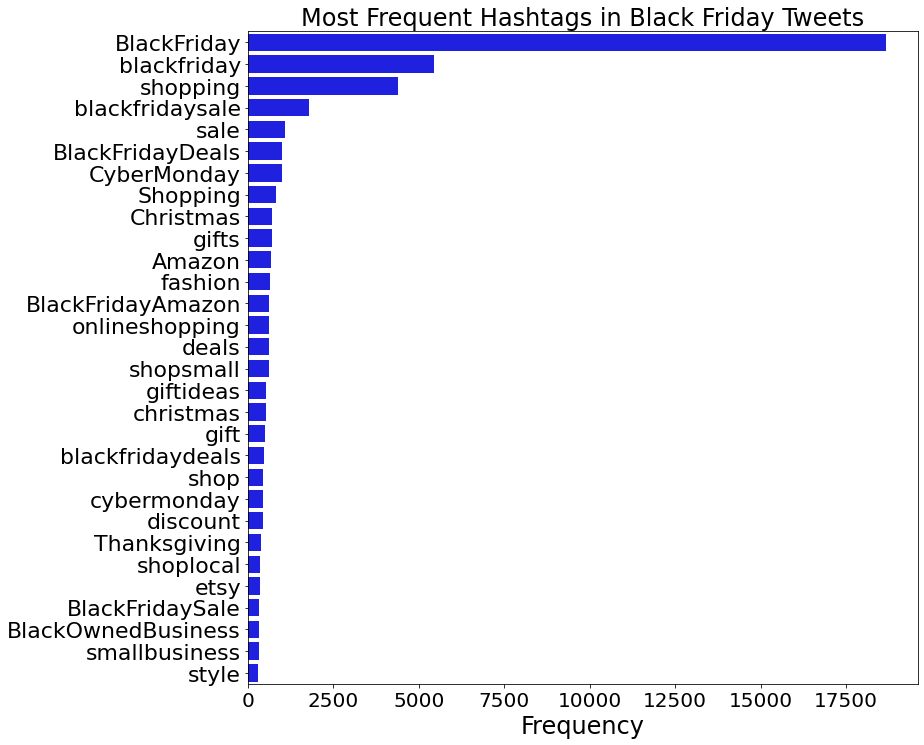

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
_ = sns.barplot(x=c_BF_count, y=c_BF_values, ax=ax, color='blue')
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Frequency', fontsize=24)
_ = ax.set_ylabel('')
_ = ax.set_title('Most Frequent Hashtags in Black Friday Tweets', fontsize=24)

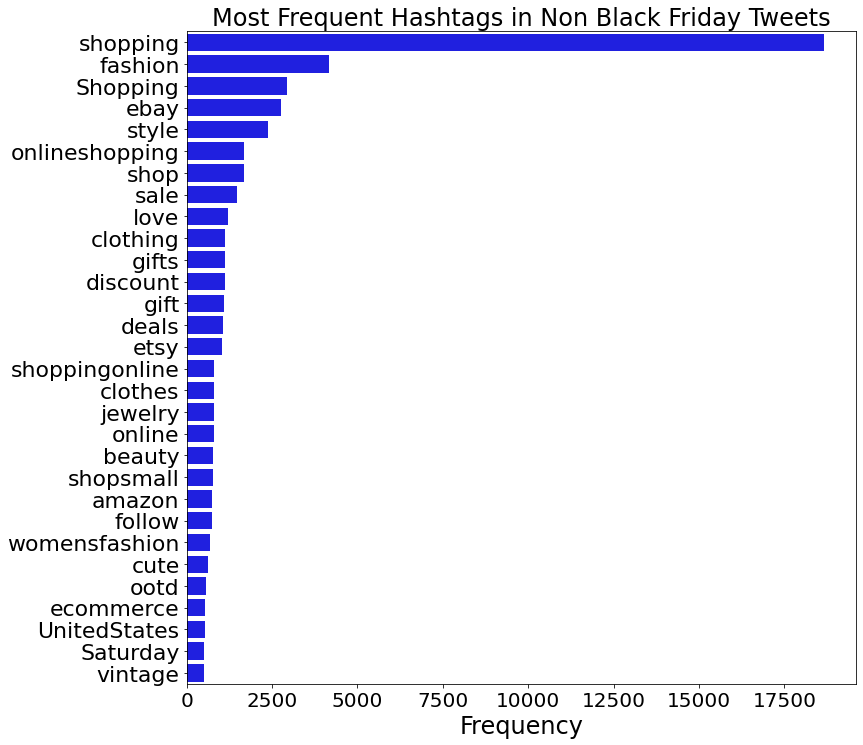

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
_ = sns.barplot(x=c_NBF_count, y=c_NBF_values, ax=ax, color='blue')
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Frequency', fontsize=24)
_ = ax.set_ylabel('')
_ = ax.set_title('Most Frequent Hashtags in Non Black Friday Tweets', fontsize=24)

We want to focus on certain brands and how their popularity varies. Therfore, we create a set of brands and check how only their popularity varies.

In [ ]:
brands = ['amazon', 'etsy', 'samsung', 'apple', 'walmart', 'ebay', 'target', 'bestbuy', 'microsoft','sephora', 'homedepot','starbucks', 'nordstrom', 'macys', 'kohls']

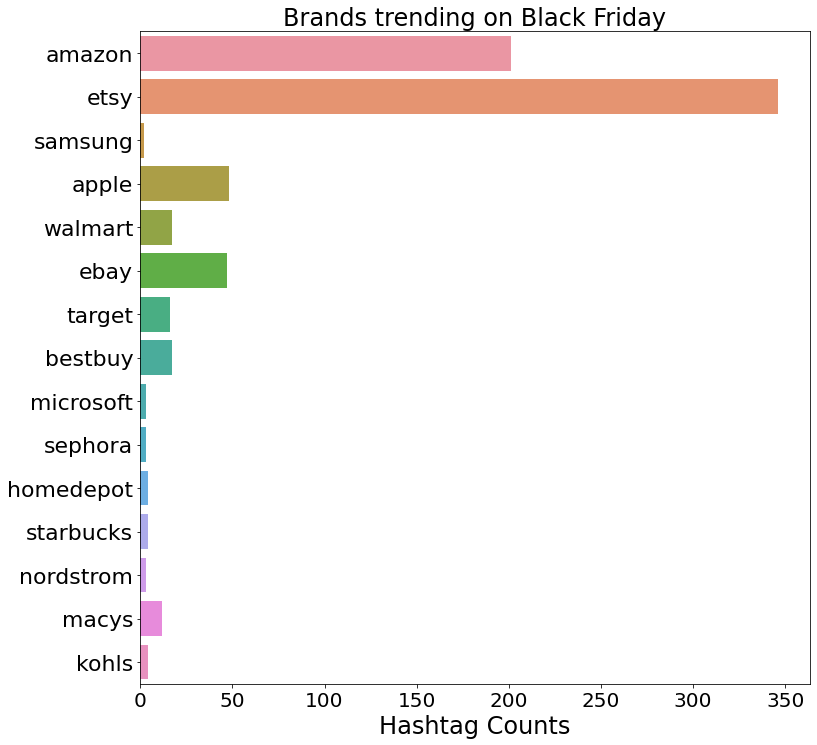

In [ ]:
ht_dict_BF = q
brands_ht = [ht_dict_BF[x] for x in brands]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 12)
_ = sns.barplot(x=brands_ht, y=brands)
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Hashtag Counts',fontsize=24)
_ = ax.set_title('Brands trending on Black Friday', fontsize=24)

In [ ]:
brandsx = ['amazon', 'etsy', 'samsung', 'apple', 'walmart', 'ebay', 'target', 'bestbuy','sephora', 'homedepot','starbucks', 'nordstrom', 'macys', 'kohls']

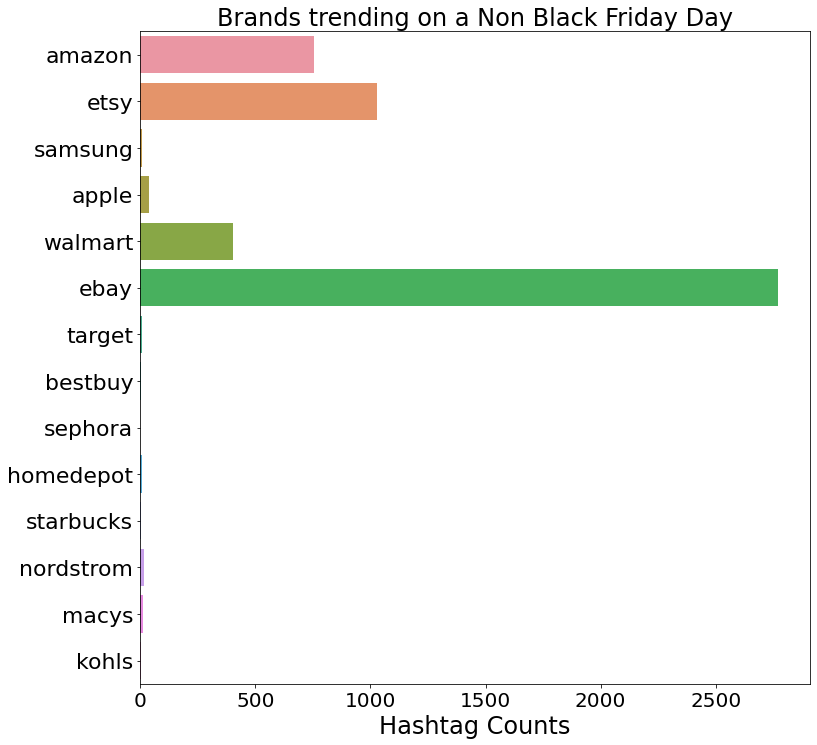

In [ ]:
ht_dict_NBF = r
brands_ht = [ht_dict_NBF[x] for x in brandsx]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 12)
_ = sns.barplot(x=brands_ht, y=brandsx)
_ = ax.tick_params(axis='x', which='major', labelsize=20)
_ = ax.tick_params(axis='y', which='major', labelsize=22)
_ = ax.set_xlabel('Hashtag Counts',fontsize=24)
_ = ax.set_title('Brands trending on a Non Black Friday Day', fontsize=24)

# Sentiment Analysis on Brands
Let us now perform more detailed sentiment analysis over brands that are seemingly popular over both black friday and a non black friday day.

**Apple:**

In [ ]:
df_BF['apple'] = (df_BF['Count(#)'] + df_BF['content']).apply(lambda x: True if 'apple' in x else False)
df_NBF['apple'] = (df_NBF['Count(#)'] + df_NBF['content']).apply(lambda x: True if 'apple' in x else False)


In [ ]:
appleTweets_BF = df_BF[df_BF['apple'] == True]
appleTweets_BF.head()

,date,content,lang,mentionedUsers,sentiment,refinedTweets,Count(#),apple
152,2020-11-27 23:56:21+00:00,WALMART MIGHT RESTOCK AT 7 PM EST - https://t....,en,None,0,WALMA MIGHTESTOCK AT PM EST #ps #playstation #...,#ps5 #playstation5 #sony #psdirect #amazon #wa...,True
292,2020-11-27 23:53:46+00:00,Keep track of your #blackfriday needs with @Yo...,en,"[{'username': 'YoudoTodos', 'displayname': 'Yo...",0,Keep track #blackfriday needs YoudoTodos get a...,#blackfriday #blackfridaysale #shopping #produ...,True
319,2020-11-27 23:53:13+00:00,Daydizzle 📌 #Lingokrazy #Daydizzle #Hiphop #SP...,en,None,0,Daydizzle #Lingokrazy #Daydizzle #Hiphop #SPOT...,#Lingokrazy #Daydizzle #Hiphop #SPOTIFYPLAYLIS...,True
477,2020-11-27 23:49:51+00:00,New single “Up My Stock” featuring @air.max365...,en,None,-1,New single Up My Stock featuring airmax NOW st...,#single #newmusicfriday #blackfriday #stock #h...,True
1389,2020-11-27 23:31:37+00:00,Alittle sunset magic #BlackFriday #blackfrida...,en,None,1,Alittle sunset magic #BlackFriday #blackfriday...,#BlackFriday #blackfridaysale #BlackFridayAmaz...,True


In [ ]:
appleTweets_NBF = df_NBF[df_NBF['apple'] == True]
appleTweets_NBF.head()

,date,content,lang,mentionedUsers,sentiment,refinedTweets,Count(#),apple
107,2020-08-30 22:13:27+00:00,"A relaxing Sunday..... Open spaces, walks, duc...",en,None,1,A relaxing Sunday Open spaces walks ducks gees...,#Tewkesbury #shopping #fruit #bankholidayfun #...,True
1056,2020-08-30 14:33:24+00:00,Digital Kitchen Scale Measuring Spoon Gram Ele...,en,None,1,Digital Kitchen Scale Measuring Spoon Gram Ele...,#COVID19 #aliexpressbonus #Aliexpress #shoppin...,True
1260,2020-08-30 12:45:27+00:00,iPhone Price Comparison https://t.co/p5z7265Tc...,en,None,0,iPhone Price Comparison #apple #iphone aapl #d...,#apple #iphone #deals #shopping,True
1587,2020-08-30 08:58:16+00:00,#beauty #fashion #music #crazy #shopping #love...,en,None,-1,#beauty #fashion #music #crazy #shopping #love...,#beauty #fashion #music #crazy #shopping #love...,True
2652,2020-08-29 21:16:15+00:00,"Case For Apple MacBook Air, Pro\n#apple #cart ...",en,None,0,Case For Apple MacBook Air Pro #apple #cart #c...,#apple #cart #case #computer #cover #Electroni...,True


In [ ]:
sentimentApple_BF = appleTweets_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentApple_BF ['% of total'] = sentimentApple_BF['count']/sentimentApple_BF['count'].sum()
sentimentApple_BF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentApple_BF = sentimentApple_BF.reindex(columns = ['sentiment', 'count','% of total'])
sentimentApple_BF

,sentiment,count,% of total
sentiment,,,
-1,Negative,10,0.131579
0,Neutral,24,0.315789
1,Positive,42,0.552632


In [ ]:
sentimentApple_NBF = appleTweets_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentApple_NBF ['% of total'] = sentimentApple_NBF['count']/sentimentApple_NBF['count'].sum()
sentimentApple_NBF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentApple_NBF = sentimentApple_NBF.reindex(columns = ['sentiment', 'count','% of total'])
sentimentApple_NBF

,sentiment,count,% of total
sentiment,,,
-1,Negative,3,0.058824
0,Neutral,29,0.568627
1,Positive,19,0.372549


**Amazon:**

In [ ]:
df_BF['amazon'] = (df_BF['Count(#)'] + df_BF['content']).apply(lambda x: True if 'amazon' in x else False)
df_NBF['amazon'] = (df_NBF['Count(#)'] + df_NBF['content']).apply(lambda x: True if 'amazon' in x else False)
amazonTweets_BF = df_BF[df_BF['amazon'] == True]
amazonTweets_NBF = df_NBF[df_NBF['amazon'] == True]

sentimentAmazon_BF = amazonTweets_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentAmazon_BF ['% of total'] = sentimentAmazon_BF['count']/sentimentAmazon_BF['count'].sum()
sentimentAmazon_BF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentAmazon_BF = sentimentAmazon_BF.reindex(columns = ['sentiment', 'count','% of total'])

sentimentAmazon_NBF = amazonTweets_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentAmazon_NBF ['% of total'] = sentimentAmazon_NBF['count']/sentimentAmazon_NBF['count'].sum()
sentimentAmazon_NBF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentAmazon_NBF = sentimentAmazon_NBF.reindex(columns = ['sentiment', 'count','% of total'])

In [ ]:
sentimentAmazon_BF

,sentiment,count,% of total
sentiment,,,
-1,Negative,67,0.144397
0,Neutral,147,0.316810
1,Positive,250,0.538793


In [ ]:
sentimentAmazon_NBF

,sentiment,count,% of total
sentiment,,,
-1,Negative,66,0.073252
0,Neutral,146,0.162042
1,Positive,689,0.764706


**Samsung:**

In [ ]:
df_BF['samsung'] = (df_BF['Count(#)'] + df_BF['content']).apply(lambda x: True if 'samsung' in x else False)
df_NBF['samsung'] = (df_NBF['Count(#)'] + df_NBF['content']).apply(lambda x: True if 'samsung' in x else False)
samsungTweets_BF = df_BF[df_BF['samsung'] == True]
samsungTweets_NBF = df_NBF[df_NBF['samsung'] == True]

sentimentSamsung_BF = samsungTweets_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentSamsung_BF ['% of total'] = sentimentSamsung_BF['count']/sentimentSamsung_BF['count'].sum()
sentimentSamsung_BF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentSamsung_BF = sentimentSamsung_BF.reindex(columns = ['sentiment', 'count','% of total'])

sentimentSamsung_NBF = samsungTweets_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentSamsung_NBF ['% of total'] = sentimentSamsung_NBF['count']/sentimentSamsung_NBF['count'].sum()
sentimentSamsung_NBF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentSamsung_NBF = sentimentSamsung_NBF.reindex(columns = ['sentiment', 'count','% of total'])

In [ ]:
sentimentSamsung_BF

,sentiment,count,% of total
sentiment,,,
-1,Negative,1,0.2
0,Neutral,2,0.4
1,Positive,2,0.4


In [ ]:
sentimentSamsung_NBF

,sentiment,count,% of total
sentiment,,,
-1,Negative,3,0.333333
0,Neutral,2,0.222222
1,Positive,4,0.444444


**eBay:**

In [ ]:
df_BF['ebay'] = (df_BF['Count(#)'] + df_BF['content']).apply(lambda x: True if 'ebay' in x else False)
df_NBF['ebay'] = (df_NBF['Count(#)'] + df_NBF['content']).apply(lambda x: True if 'ebay' in x else False)
ebayTweets_BF = df_BF[df_BF['ebay'] == True]
ebayTweets_NBF = df_NBF[df_NBF['ebay'] == True]

sentimentEbay_BF = ebayTweets_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentEbay_BF ['% of total'] = sentimentEbay_BF['count']/sentimentEbay_BF['count'].sum()
sentimentEbay_BF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentEbay_BF = sentimentEbay_BF.reindex(columns = ['sentiment', 'count','% of total'])

sentimentEbay_NBF = ebayTweets_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentEbay_NBF ['% of total'] = sentimentEbay_NBF['count']/sentimentEbay_NBF['count'].sum()
sentimentEbay_NBF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentEbay_NBF = sentimentEbay_NBF.reindex(columns = ['sentiment', 'count','% of total'])

In [ ]:
sentimentEbay_BF

,sentiment,count,% of total
sentiment,,,
-1,Negative,17,0.242857
0,Neutral,17,0.242857
1,Positive,36,0.514286


In [ ]:
sentimentEbay_NBF

,sentiment,count,% of total
sentiment,,,
-1,Negative,386,0.133103
0,Neutral,1287,0.443793
1,Positive,1227,0.423103


**Walmart:**

In [ ]:
df_BF['walmart'] = (df_BF['Count(#)'] + df_BF['content']).apply(lambda x: True if 'walmart' in x else False)
df_NBF['walmart'] = (df_NBF['Count(#)'] + df_NBF['content']).apply(lambda x: True if 'walmart' in x else False)
walmartTweets_BF = df_BF[df_BF['walmart'] == True]
walmartTweets_NBF = df_NBF[df_NBF['walmart'] == True]

sentimentWalmart_BF = walmartTweets_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentWalmart_BF ['% of total'] = sentimentWalmart_BF['count']/sentimentWalmart_BF['count'].sum()
sentimentWalmart_BF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentWalmart_BF = sentimentWalmart_BF.reindex(columns = ['sentiment', 'count','% of total'])

sentimentWalmart_NBF = walmartTweets_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentWalmart_NBF ['% of total'] = sentimentWalmart_NBF['count']/sentimentWalmart_NBF['count'].sum()
sentimentWalmart_NBF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentWalmart_NBF = sentimentWalmart_NBF.reindex(columns = ['sentiment', 'count','% of total'])

In [ ]:
sentimentWalmart_BF

,sentiment,count,% of total
sentiment,,,
-1,Negative,5,0.178571
0,Neutral,10,0.357143
1,Positive,13,0.464286


In [ ]:
sentimentWalmart_NBF

,sentiment,count,% of total
sentiment,,,
-1,Negative,50,0.123153
0,Neutral,174,0.428571
1,Positive,182,0.448276


**Etsy:**

In [ ]:
df_BF['etsy'] = (df_BF['Count(#)'] + df_BF['content']).apply(lambda x: True if 'etsy' in x else False)
df_NBF['etsy'] = (df_NBF['Count(#)'] + df_NBF['content']).apply(lambda x: True if 'etsy' in x else False)
etsyTweets_BF = df_BF[df_BF['etsy'] == True]
etsyTweets_NBF = df_NBF[df_NBF['etsy'] == True]

sentimentEtsy_BF = etsyTweets_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentEtsy_BF ['% of total'] = sentimentEtsy_BF['count']/sentimentEtsy_BF['count'].sum()
sentimentEtsy_BF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentEtsy_BF = sentimentEtsy_BF.reindex(columns = ['sentiment', 'count','% of total'])

sentimentEtsy_NBF = etsyTweets_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentEtsy_NBF ['% of total'] = sentimentEtsy_NBF['count']/sentimentEtsy_NBF['count'].sum()
sentimentEtsy_NBF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentEtsy_NBF = sentimentEtsy_NBF.reindex(columns = ['sentiment', 'count','% of total'])

In [ ]:
sentimentEtsy_BF

,sentiment,count,% of total
sentiment,,,
-1,Negative,118,0.254310
0,Neutral,131,0.282328
1,Positive,215,0.463362


In [ ]:
sentimentEtsy_NBF

,sentiment,count,% of total
sentiment,,,
-1,Negative,176,0.155340
0,Neutral,410,0.361871
1,Positive,547,0.482789


**Microsoft:**

In [ ]:
df_BF['microsoft'] = (df_BF['Count(#)'] + df_BF['content']).apply(lambda x: True if 'etsy' in x else False)
df_NBF['microsoft'] = (df_NBF['Count(#)'] + df_NBF['content']).apply(lambda x: True if 'etsy' in x else False)
microsoftTweets_BF = df_BF[df_BF['microsoft'] == True]
microsoftTweets_NBF = df_NBF[df_NBF['microsoft'] == True]

sentimentMicrosoft_BF = microsoftTweets_BF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentMicrosoft_BF ['% of total'] = sentimentMicrosoft_BF['count']/sentimentMicrosoft_BF['count'].sum()
sentimentMicrosoft_BF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentMicrosoft_BF = sentimentMicrosoft_BF.reindex(columns = ['sentiment', 'count','% of total'])

sentimentMicrosoft_NBF = microsoftTweets_NBF.groupby('sentiment').agg({'sentiment':'count'}).rename(columns=({'sentiment': 'count'}))
sentimentMicrosoft_NBF ['% of total'] = sentimentMicrosoft_NBF['count']/sentimentMicrosoft_NBF['count'].sum()
sentimentMicrosoft_NBF ['sentiment'] = ['Negative', 'Neutral', 'Positive']
sentimentMicrosoft_NBF = sentimentMicrosoft_NBF.reindex(columns = ['sentiment', 'count','% of total'])

In [ ]:
sentimentMicrosoft_BF

,sentiment,count,% of total
sentiment,,,
-1,Negative,118,0.254310
0,Neutral,131,0.282328
1,Positive,215,0.463362


In [ ]:
sentimentMicrosoft_NBF

,sentiment,count,% of total
sentiment,,,
-1,Negative,176,0.155340
0,Neutral,410,0.361871
1,Positive,547,0.482789
